## importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

## Data Preprocessing

In [2]:
face_dataset = fetch_olivetti_faces()

X = face_dataset.data
y = face_dataset.target

print(f"dataset shape: {X.shape}")
print(f"dataset target shape: {y.shape}")

dataset shape: (400, 4096)
dataset target shape: (400,)


In [3]:
# data spliting 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"train shape: {X_train.shape}")
print(f"test shape: {X_test.shape}")

train shape: (280, 4096)
test shape: (120, 4096)


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## PCA

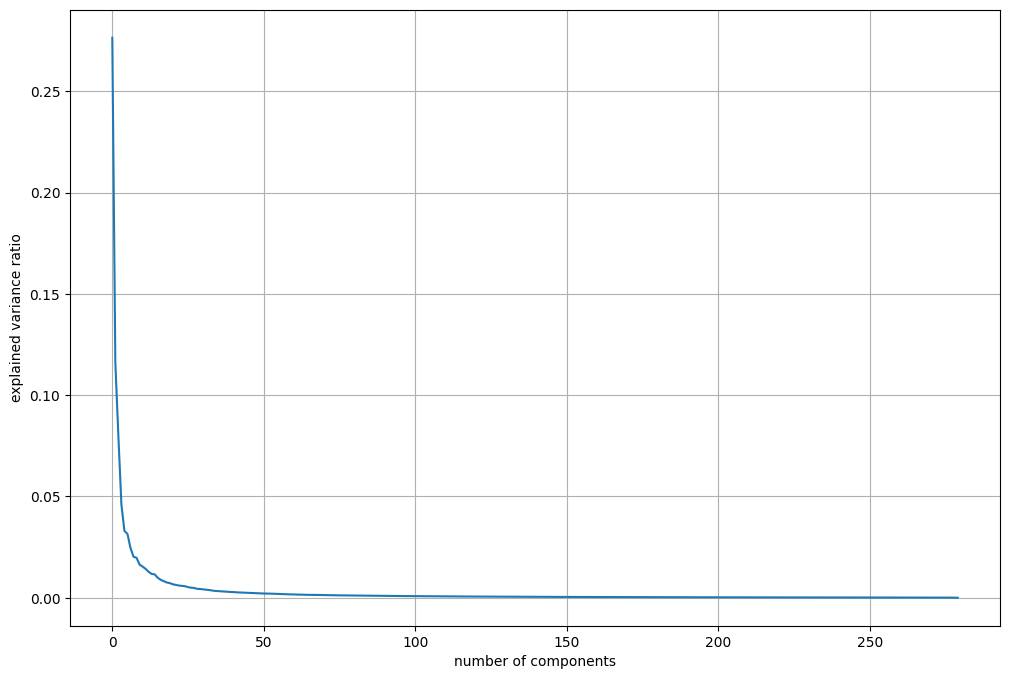

In [5]:
# deciding the number of components
pca = PCA()
pca.fit(X_train)

plt.figure(1, figsize=(12, 8))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("number of components")
plt.ylabel("explained variance ratio")
plt.grid()
plt.show()

In [6]:
# pca = PCA(n_components=80, whiten=True, random_state=42)
pca = PCA(n_components=0.95, whiten=True, random_state=42)
X_train_p = pca.fit_transform(X_train)
X_test_p = pca.transform(X_test)

print(f"shpae after pca: {X_train_p.shape}")
print(f"shpae after pca: {X_test_p.shape}")

shpae after pca: (280, 104)
shpae after pca: (120, 104)


## SVM with Grid Search

In [7]:
svm = SVC()

param = {
    'C' : [0.1, 1, 10, 20, 50, 100],
    'gamma' : ['scale', 'auto'],
    'kernel' : ['rbf', 'linear', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(
    svm,
    param,
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train_p, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [8]:
svm = SVC(C=10, kernel='sigmoid', gamma='scale')
svm.fit(X_train_p, y_train)


y_pred = svm.predict(X_test_p)
acc = accuracy_score(y_test, y_pred)
print(f"accuracy: {acc}")

accuracy: 0.9916666666666667


In [9]:
clf_rep = classification_report(y_test, y_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    

<Axes: >

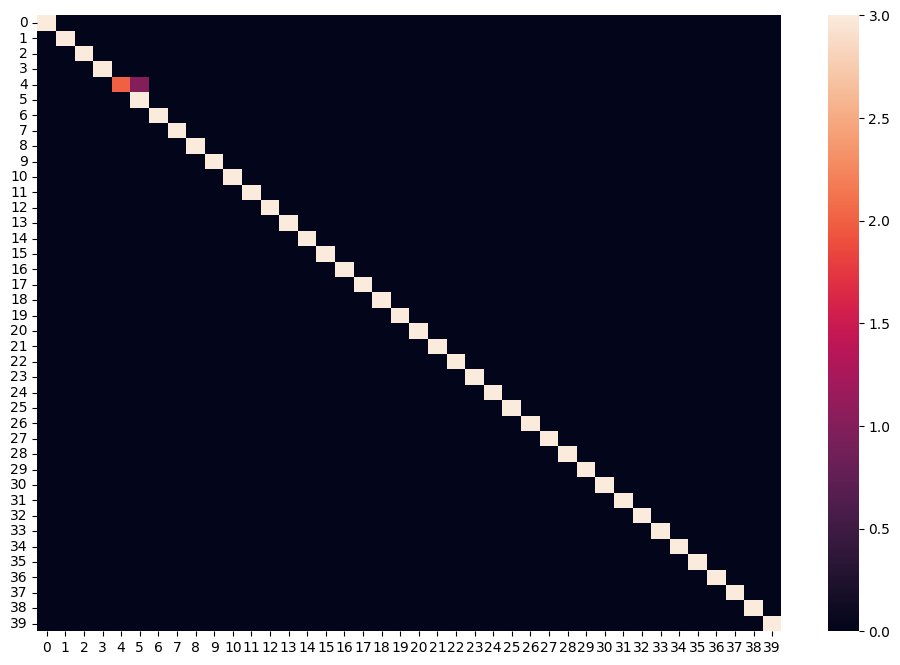

In [10]:
plt.figure(figsize=(12 ,8))
sns.heatmap(confusion_matrix(y_test, y_pred))